# Project: Investigate a Dataset - [No show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Dataset Description
This dataset collects information from over 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> **PatientId** shows the identification number of each patient.
> **AppointmentID** shows the identification number of the appointment.
> **Gender** shows if the patient is male or female.
> **ScheduledDay** tells us on what day the patient set up their appointment. 
> **AppointmentDay** tells us on what day the patient is expected to show up for their appointment.
> **Age** tells us the age of the patient.
> **Neighborhood** indicates the location of the hospital. 
> **Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
> **Hipertension** tells if the patient is hypertensive or not.
> **Diabetes** tells us if the patient is diabetic or not.
> **Alcoholism** tells us if the patient is an alcoholic or not.
> **SMS_received** captures if the patient got an sms or not.
> **No - show** says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

**Question(s) for Analysis**
##### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
1. How does age relate to the possibility of a patient showing up or not?
2. What is the effect  of getting an sms with respect to the patient showing up?
3. Do people who have longer waiting periods show up more?
4. Do males or females show up more?
5. Does having a scholarship influence the possibility of showing up to the appointment?
6. Are people in a particular neighborhood more likely to show up?
7. Does having any illnesses or being an alcoholic influence the possibility of patients showing up?

In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In [3]:
df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

change all columns to lower case and replace '-' with '_' for compliance with python rules

In [7]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

delete redundant columns from dataframe

In [8]:
df.drop(['patientid' , 'appointmentid' , 'handcap'] , axis = 1 , inplace = True)

convert scheduled day and appointment day from string to datetime data type.

In [9]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

find how many entries have minimum age as '-1'

In [10]:
df[df.age == -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,No


Delete the row with '-1' as age for a more accurate dataset

In [11]:
df.drop(df[df.age == -1].index, inplace=True)

check for successful conversion of datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110526 non-null  object             
 1   scheduledday    110526 non-null  datetime64[ns, UTC]
 2   appointmentday  110526 non-null  datetime64[ns, UTC]
 3   age             110526 non-null  int64              
 4   neighbourhood   110526 non-null  object             
 5   scholarship     110526 non-null  int64              
 6   hipertension    110526 non-null  int64              
 7   diabetes        110526 non-null  int64              
 8   alcoholism      110526 non-null  int64              
 9   sms_received    110526 non-null  int64              
 10  no_show         110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(6), object(3)
memory usage: 10.1+ MB


Check that column changes have been effected, the new size of the dataframe and the summary of the data left

In [13]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,No


In [14]:
df.shape

(110526, 11)

In [15]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Create bins to divide the ages into groups and add a new column to contain them in the data frame

In [16]:
age_bins = [0 , 18.000000 , 37.000000 , 55.000000 , 115.000000]
bin_names = ['young' , 'young_adult' , 'adult' , 'old' ]
df['age_grade'] = pd.cut(df['age'], age_bins , labels=bin_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110526 non-null  object             
 1   scheduledday    110526 non-null  datetime64[ns, UTC]
 2   appointmentday  110526 non-null  datetime64[ns, UTC]
 3   age             110526 non-null  int64              
 4   neighbourhood   110526 non-null  object             
 5   scholarship     110526 non-null  int64              
 6   hipertension    110526 non-null  int64              
 7   diabetes        110526 non-null  int64              
 8   alcoholism      110526 non-null  int64              
 9   sms_received    110526 non-null  int64              
 10  no_show         110526 non-null  object             
 11  age_grade       106987 non-null  category           
dtypes: category(1), datetime64[ns, UTC](2), int64(6), object(3)
memory usage

Convert the data type for age_grade to strings

In [17]:
df['age_grade'] = df['age_grade'].astype(str)
type(df['age_grade'][0])

str

Replace null age_grades with 'babies' since all the null age grades have 0 as age 

In [18]:
df.loc[df.age_grade == 'nan', 'age_grade'] = 'babies'
df.groupby('age_grade').count()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
age_grade,,,,,,,,,,,
adult,26906,26906,26906,26906,26906,26906,26906,26906,26906,26906,26906
babies,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539
old,27504,27504,27504,27504,27504,27504,27504,27504,27504,27504,27504
young,25327,25327,25327,25327,25327,25327,25327,25327,25327,25327,25327
young_adult,27250,27250,27250,27250,27250,27250,27250,27250,27250,27250,27250


In [19]:
df.groupby('age_grade').mean()

,age,scholarship,hipertension,diabetes,alcoholism,sms_received
age_grade,,,,,,
adult,46.671226,0.109344,0.239166,0.074965,0.062291,0.334424
babies,0.000000,0.014693,0.000000,0.000000,0.000000,0.253461
old,67.222186,0.035268,0.514507,0.201534,0.039994,0.316936
young,8.984088,0.125676,0.001579,0.002014,0.001106,0.298180
young_adult,28.152954,0.136294,0.043119,0.012183,0.020404,0.341945


For better understanding and clarity, change no_show column name to show_up

In [20]:
df = df.rename(columns = {'no_show' : 'show_up'})

Replace yes/no with values 0/1 where 0 = absent and 1 = present

In [21]:
df.loc[df.show_up == 'Yes', 'show_up'] = 0
df.loc[df.show_up == 'No', 'show_up'] = 1

Create a column to calculate the waiting period of patients.

In [22]:
df['wait_time'] = df['appointmentday'] - df['scheduledday']
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,show_up,age_grade,wait_time
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,1,old,-1 days +05:21:52
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,1,old,-1 days +07:51:33
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,1,old,-1 days +07:40:56
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,1,young,-1 days +06:30:29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,1,old,-1 days +07:52:37


Drop scheduled day and appointment day columns since they won't be used again

In [23]:
df.drop(['scheduledday' , 'appointmentday'] , axis = 1 , inplace = True)

Compare positive and negative wait_time periods for exploratory purposes

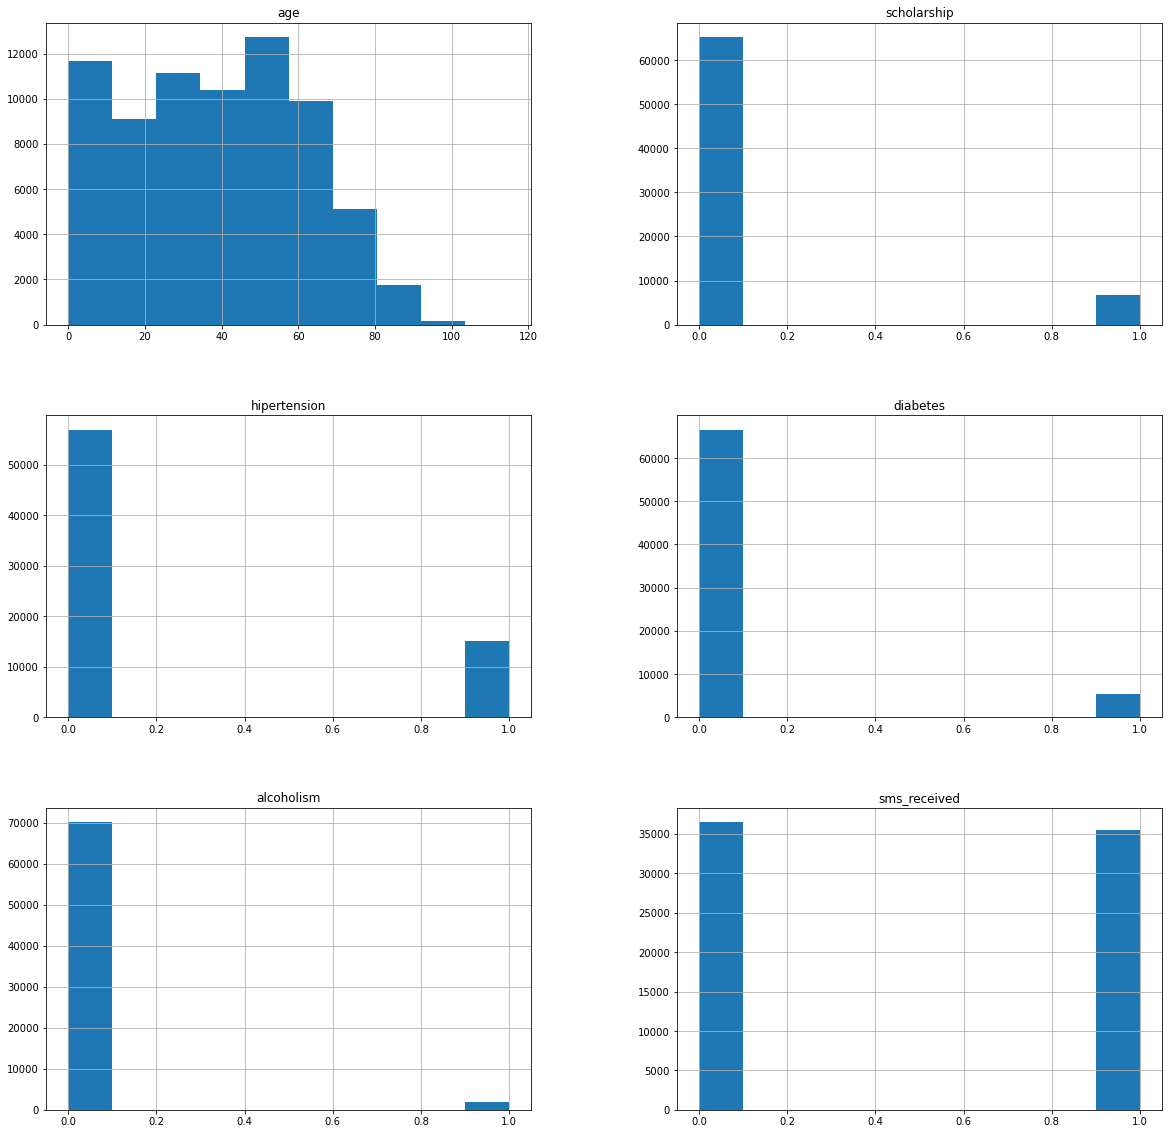

In [24]:
pos_wait = df[df['wait_time'] >= pd.to_timedelta(0)]
pos_wait.hist(figsize = (20,20));

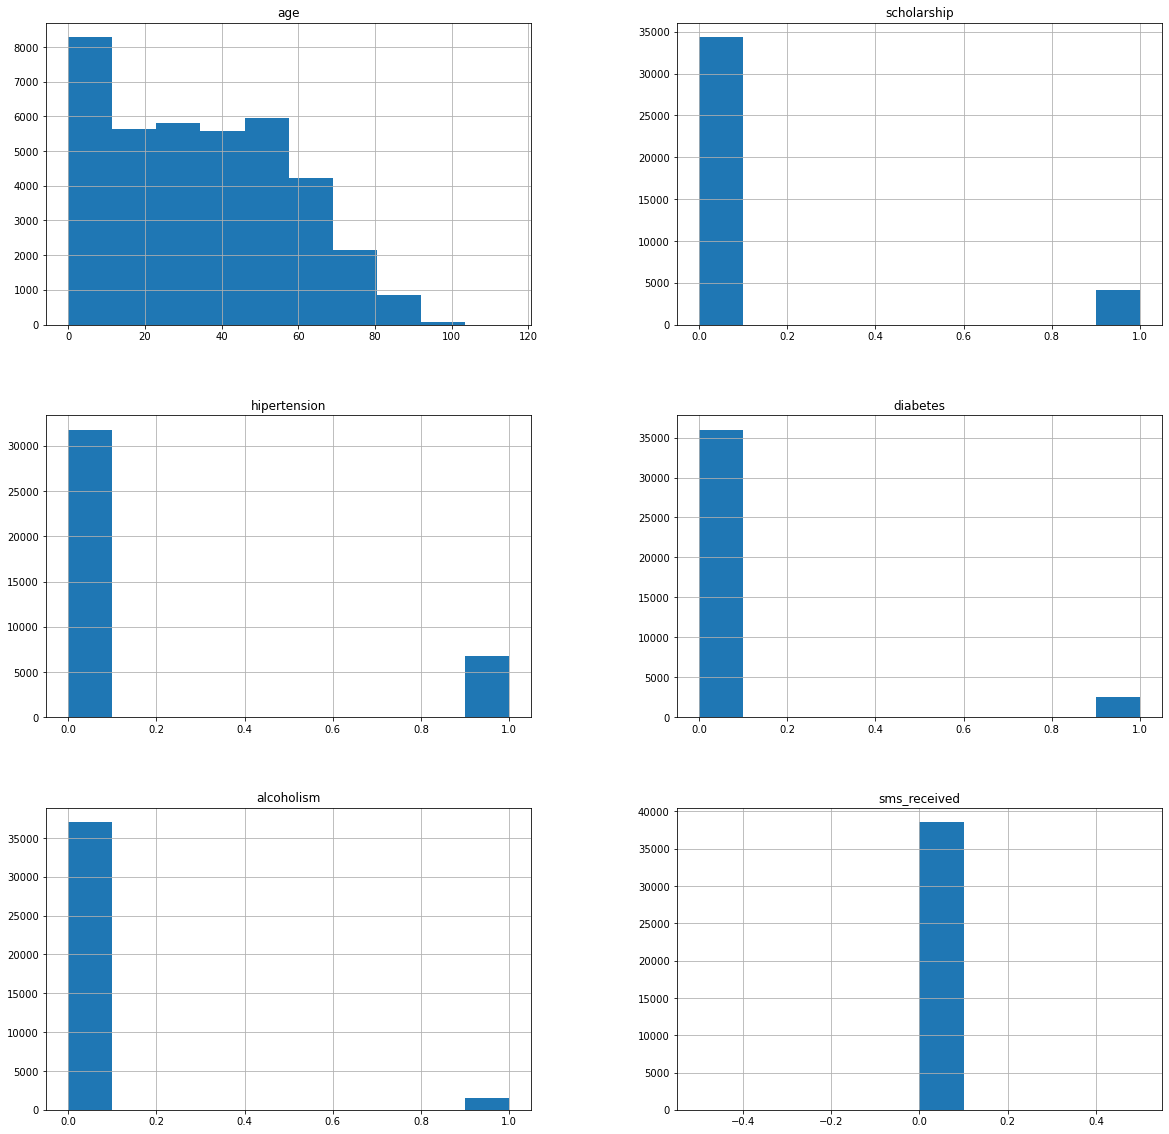

In [25]:
neg_wait = df[df['wait_time'] < pd.to_timedelta(0)]
neg_wait.hist(figsize = (20,20));

Drop data where the wait time is less than 0 to ensure more accuracy of the results

In [26]:
df.drop(df[df['wait_time'] < pd.to_timedelta(0)].index, inplace=True)

Convert wait time into just days

In [27]:
df['wait_time'] = df.wait_time.dt.days

In [28]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,sms_received,show_up,age_grade,wait_time
5,F,76,REPÚBLICA,0,1,0,0,0,1,old,1
6,F,23,GOIABEIRAS,0,0,0,0,0,0,young_adult,1
7,F,39,GOIABEIRAS,0,0,0,0,0,0,adult,1
9,F,19,CONQUISTA,0,0,0,0,0,1,young_adult,1
10,F,30,NOVA PALESTINA,0,0,0,0,0,1,young_adult,1


<a id='eda'></a>
## Exploratory Data Analysis

Explore data distribution along the dataframe

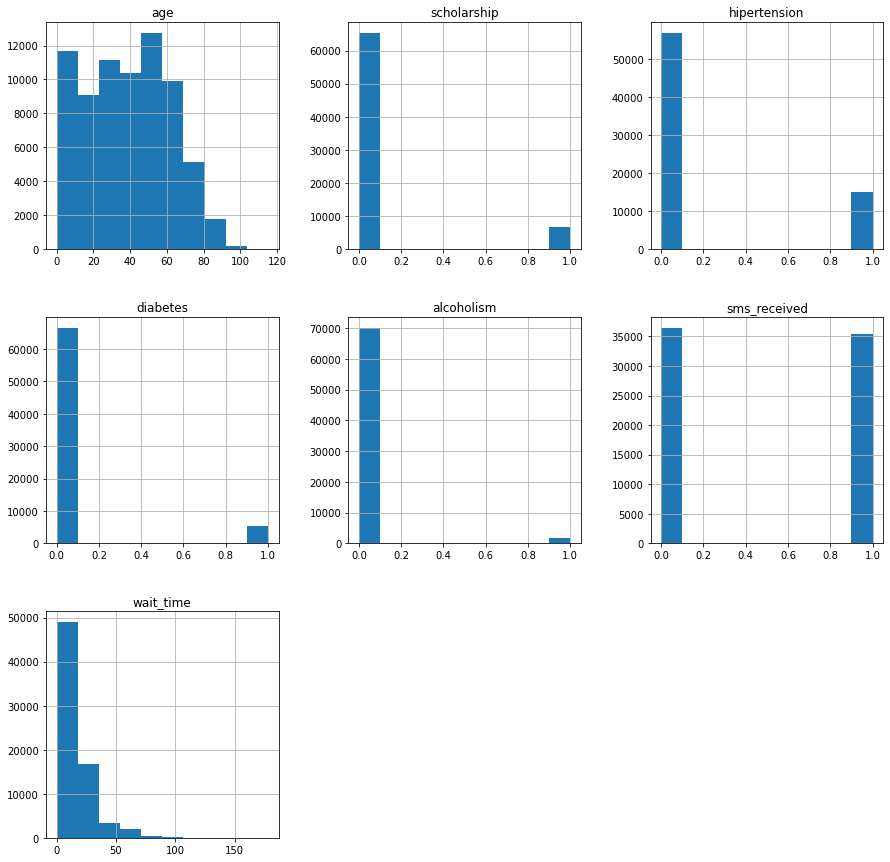

In [29]:
df.hist(figsize = (15,15));

In [30]:
y_show = df[df['show_up'] == 1]
n_show = df[df['show_up'] == 0]

Compare differences or similarities between patients who showed up and those who didn't

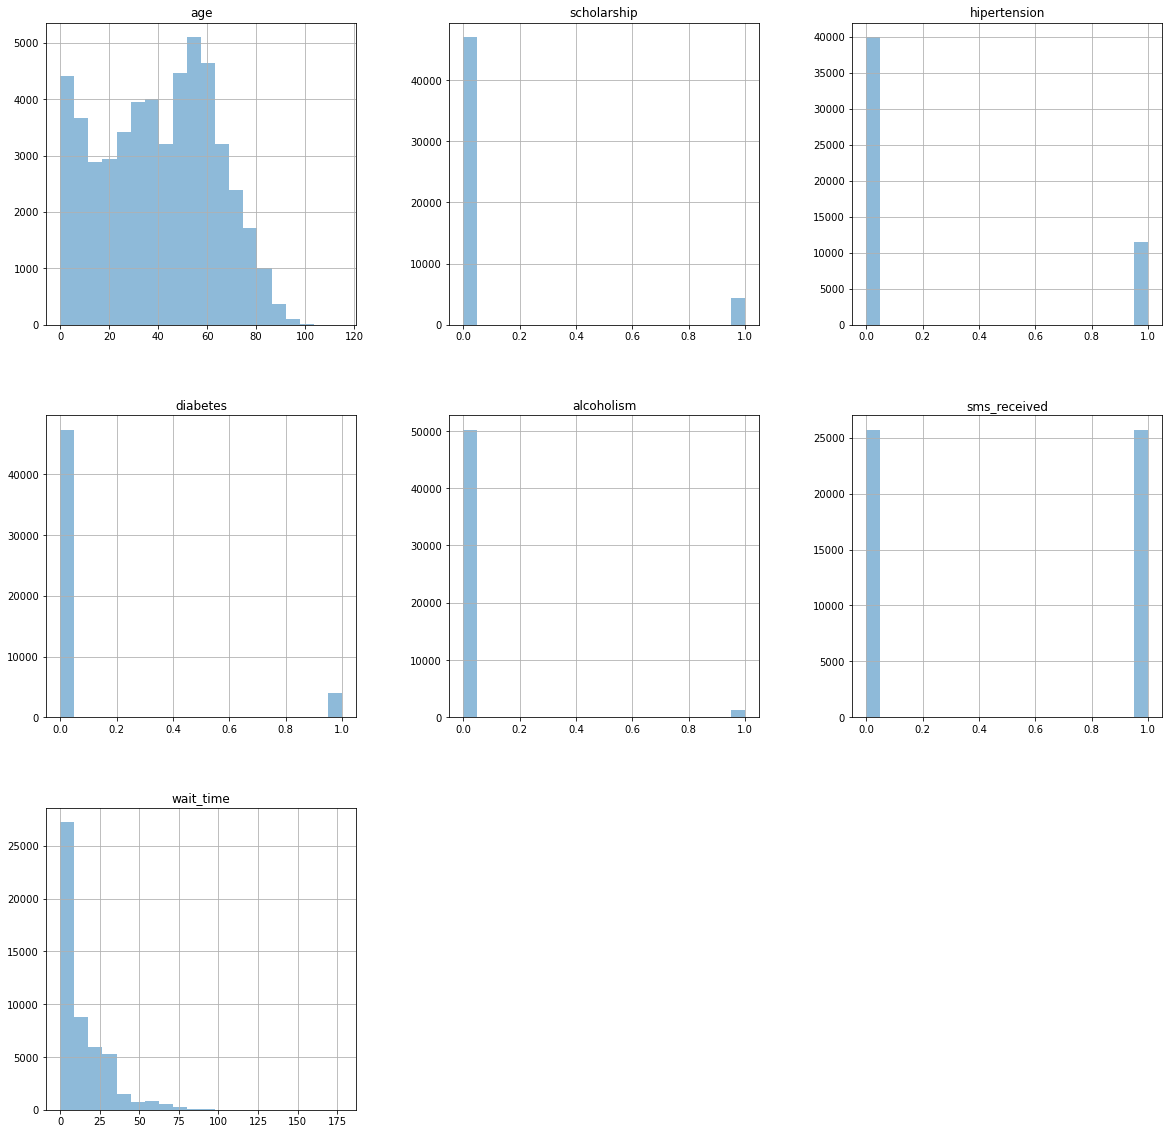

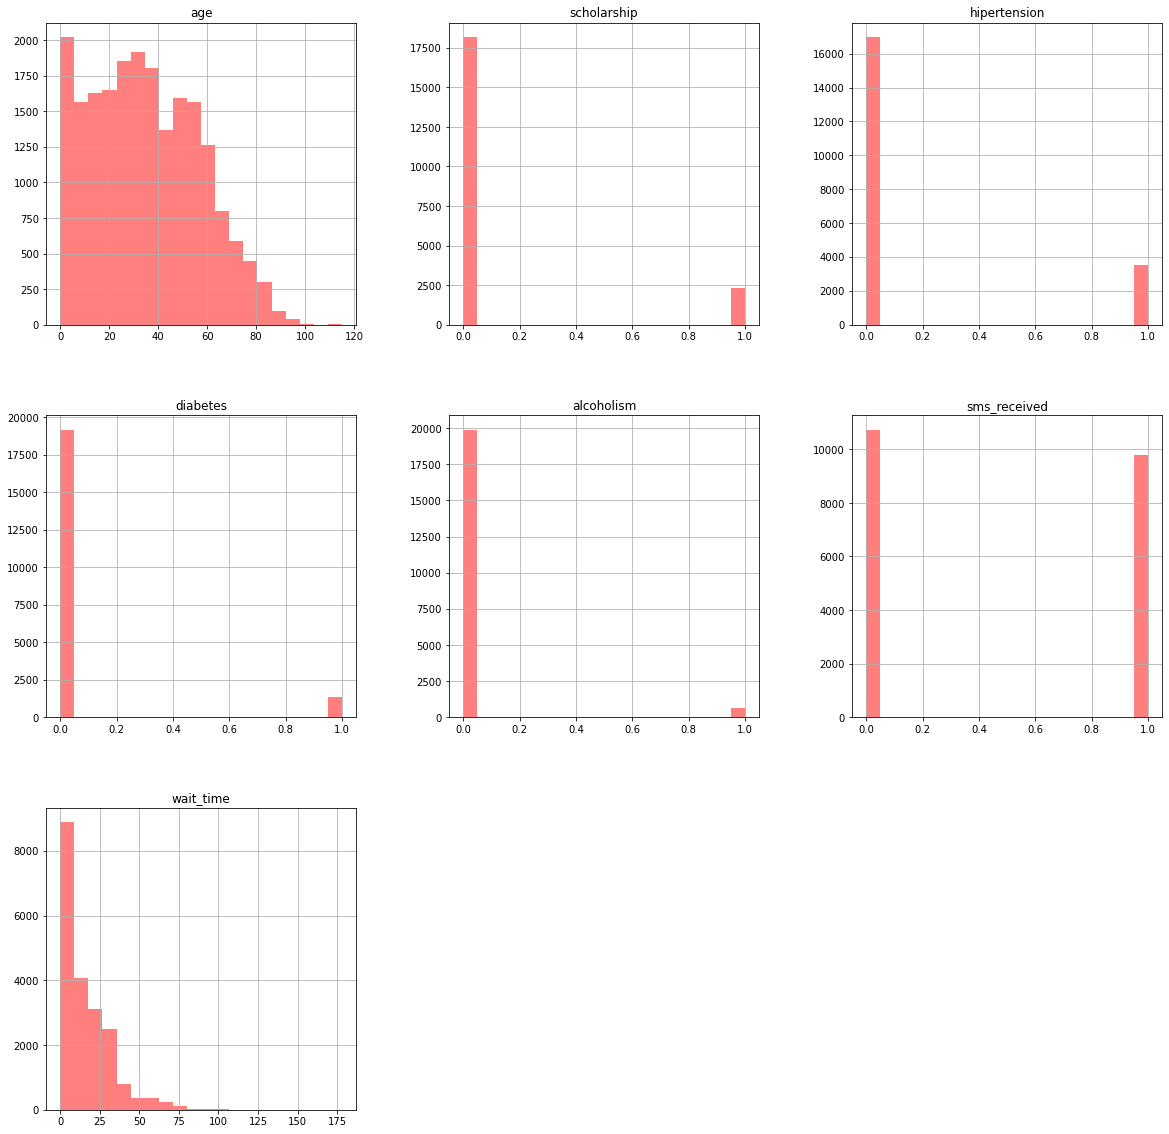

In [31]:
y_show.hist(figsize=(20,20) , alpha = 0.5 , bins = 20 , label = 'showed up')
n_show.hist(figsize=(20,20) , alpha = 0.5 , bins = 20 , color = 'r' , label = 'missed appointment');

### How does age relate to the possibility of a patient showing up or not?

In [32]:
age_count = df.groupby(['age_grade' , 'show_up']).count().age
age_count

age_grade    show_up
adult        0           4934
             1          13026
babies       0            588
             1           1543
old          0           4060
             1          15168
young        0           4949
             1           9955
young_adult  0           5991
             1          11745
Name: age, dtype: int64

Assign functions to indicate patients who showed up and those who didn't

In [33]:
present = df.show_up == True
absent = df.show_up == False

present

5          True
6         False
7         False
9          True
10         True
          ...  
110522     True
110523     True
110524     True
110525     True
110526     True
Name: show_up, Length: 71959, dtype: bool

In [34]:
absent

5         False
6          True
7          True
9         False
10        False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: show_up, Length: 71959, dtype: bool

In [35]:
df.age[absent].mean()

34.835298703830034

In [36]:
df.age[present].mean()

39.96570562046776

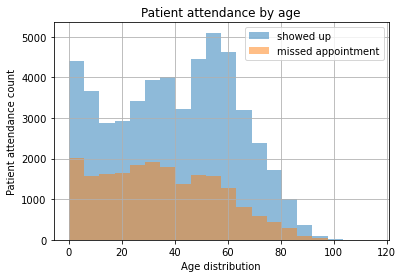

In [37]:
df.age[present].hist(alpha = 0.5 , bins = 20 , label = 'showed up')
df.age[absent].hist(alpha = 0.5 , bins = 20 , label = 'missed appointment')
plt.legend();

plt.title('Patient attendance by age')
plt.xlabel('Age distribution')
plt.ylabel('Patient attendance count');

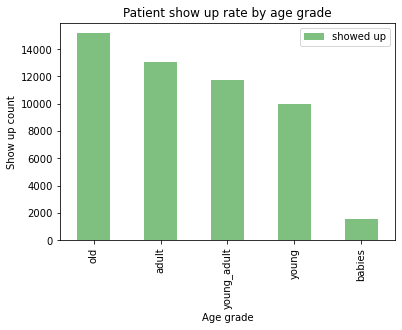

In [38]:
df.age_grade[present].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='showed up')
plt.legend();

plt.title('Patient show up rate by age grade')
plt.xlabel('Age grade')
plt.ylabel('Show up count');

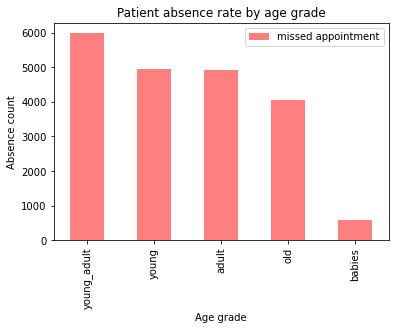

In [39]:
df.age_grade[absent].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='missed appointment')
plt.legend();

plt.title('Patient absence rate by age grade')
plt.xlabel('Age grade')
plt.ylabel('Absence count');

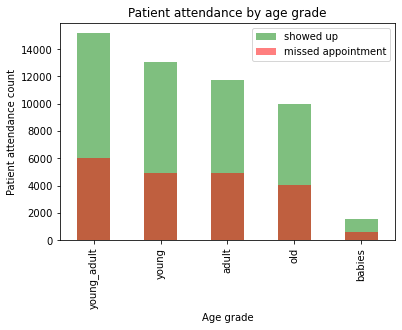

In [40]:
df.age_grade[present].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='showed up')
df.age_grade[absent].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='missed appointment')
plt.legend();

plt.title('Patient attendance by age grade')
plt.xlabel('Age grade')
plt.ylabel('Patient attendance count');

**Observation:** There is no correlation between the age/age grade and the possibility of showing up for an appointment. Although most of the patients fall within the age grades of young to adult, most patients across all ages show up than do not show up.

### What is the effect  of getting an sms with respect to the patient showing up?

In [41]:
df.groupby(['sms_received' , 'show_up']).count()

gender    age  neighbourhood  scholarship  hipertension  \
sms_received show_up                                                            
0            0         10738  10738          10738        10738         10738   
             1         25739  25739          25739        25739         25739   
1            0          9784   9784           9784         9784          9784   
             1         25698  25698          25698        25698         25698   

                      diabetes  alcoholism  age_grade  wait_time  
sms_received show_up                                              
0            0           10738       10738      10738      10738  
             1           25739       25739      25739      25739  
1            0            9784        9784       9784       9784  
             1           25698       25698      25698      25698

In [42]:
df.sms_received[absent].value_counts()

0    10738
1     9784
Name: sms_received, dtype: int64

In [43]:
df.sms_received[present].value_counts()

0    25739
1    25698
Name: sms_received, dtype: int64

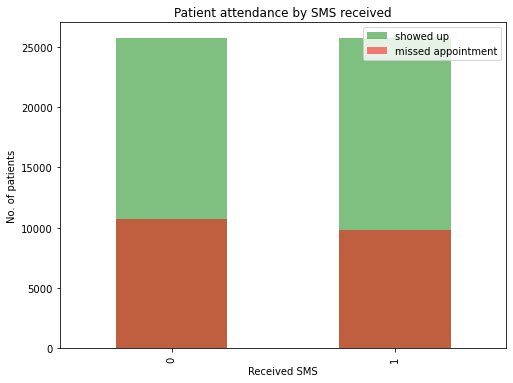

In [73]:
plt.rcParams["figure.figsize"] = (8,6)

df.sms_received[present].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='showed up')
df.sms_received[absent].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='missed appointment')
plt.legend();

plt.title('Patient attendance by SMS received')
plt.xlabel('Received SMS')
plt.ylabel('No. of patients');

**Observation:** There is no correlation between patients who received sms and attendance to their appointment. A few patients who received sms missed their appointments but most patients showed up regarless of whether they received an sms or not.

### Do people who have longer waiting periods show up more?

Find the mean attendance and absence per wait time

In [45]:
df.wait_time[present].mean()

14.013142290569046

In [46]:
df.wait_time[absent].mean()

16.21825358152227

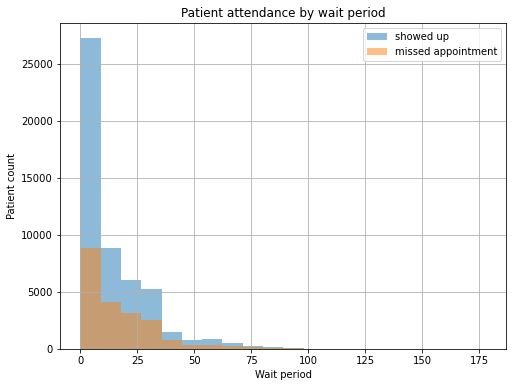

In [80]:
plt.rcParams["figure.figsize"] = (8,6)

df.wait_time[present].hist(alpha = 0.5 , bins = 20 , label = 'showed up')
df.wait_time[absent].hist(alpha = 0.5 , bins = 20 , label = 'missed appointment')
plt.legend();

plt.title('Patient attendance by wait period')
plt.xlabel('Wait period')
plt.ylabel('Patient count');

Get an understanding of the amount of patients that were assigned to each wait time. 

In [48]:
df.groupby(['wait_time' , 'show_up']).count().age

wait_time  show_up
0          0          1113
           1          4100
1          0          1602
           1          5123
2          0           644
                      ... 
168        1             7
175        0             6
           1            10
178        0             2
           1             8
Name: age, Length: 233, dtype: int64

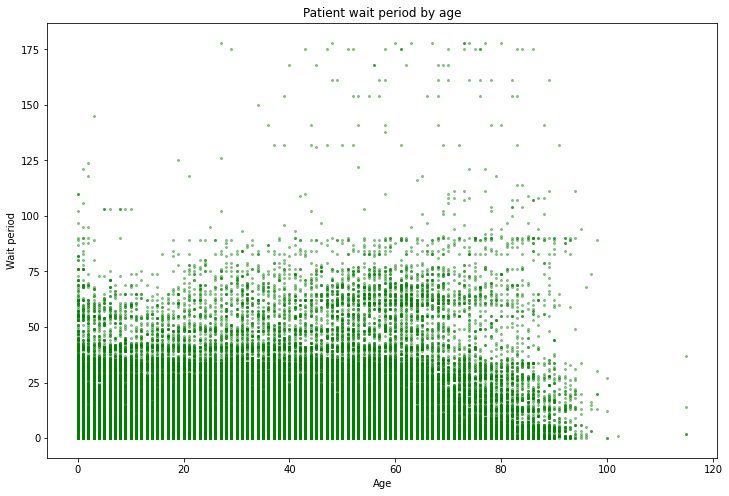

In [111]:
plt.rcParams["figure.figsize"] = (12,8)
x = df['age']
y = df['wait_time']

plt.scatter(x , y , s = 4, c = 'green' , alpha= .4)

plt.title('Patient wait period by age')
plt.xlabel('Age')
plt.ylabel('Wait period');

A visualization of the concentration of patients, by their ages, across waiting times. As the days increase, the number of patients reduce.

> **Observation:** There is a noticeable drop in the number of patients as the days increase which explains why the the graph "Patient attendance by wait period" is more skewed to the right. The rate at which patients showed up was twice as much as they didnt when compared with patients within the same waiting period. 

### Do males or females show up more?

In [86]:
females = df[df['gender'] == "F"]
males = df[df['gender'] == "M"]

females.count().gender

48070

In [87]:
males.count().gender

23889

In [88]:
df.groupby(['gender' , 'show_up']).count().diabetes

gender  show_up
F       0          13674
        1          34396
M       0           6848
        1          17041
Name: diabetes, dtype: int64

In [83]:
df.groupby(['gender' , 'show_up']).mean()

age  scholarship  hipertension  diabetes  alcoholism  \
gender show_up                                                               
F      0        36.380649     0.143411      0.182975  0.069694    0.021135   
       1        41.607193     0.104285      0.235551  0.081289    0.012443   
M      0        31.749562     0.054322      0.150993  0.056805    0.048481   
       1        36.652485     0.044070      0.199167  0.072707    0.045361   

                sms_received  wait_time  
gender show_up                           
F      0            0.491444  16.105675  
       1            0.508257  14.133940  
M      0            0.447430  16.443049  
       1            0.482131  13.769321

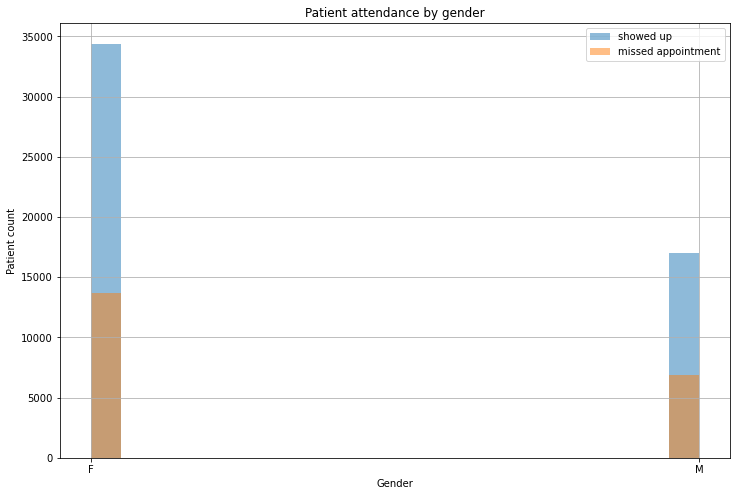

In [112]:
df.gender[present].hist(alpha = 0.5 , bins = 20 , label = 'showed up')
df.gender[absent].hist(alpha = 0.5 , bins = 20 , label = 'missed appointment')
plt.legend();

plt.title('Patient attendance by gender')
plt.xlabel('Gender')
plt.ylabel('Patient count');

**Observation:** There are more female patients than male patients from the table above and therefore more patients who show up are female. However, when compared with the rate at which both genders did and did not show up, each gender showed up over 2 times more than they didn't show up. Generally most people will show up for their appointment regardless of their gender.

### Does having a scholarship influence the possibility of showing up to the appointment?

In [85]:
df.groupby(['scholarship' , 'show_up']).mean()

age  hipertension  diabetes  alcoholism  \
scholarship show_up                                                  
0           0        35.456815      0.175711  0.067568    0.026500   
            1        40.725472      0.226714  0.080448    0.022739   
1           0        29.989713      0.145735  0.048435    0.059580   
            1        31.716690      0.188566  0.056708    0.029968   

                     sms_received  wait_time  
scholarship show_up                           
0           0            0.472813  16.395459  
            1            0.496338  14.156182  
1           0            0.507501  14.836691  
            1            0.535039  12.460120

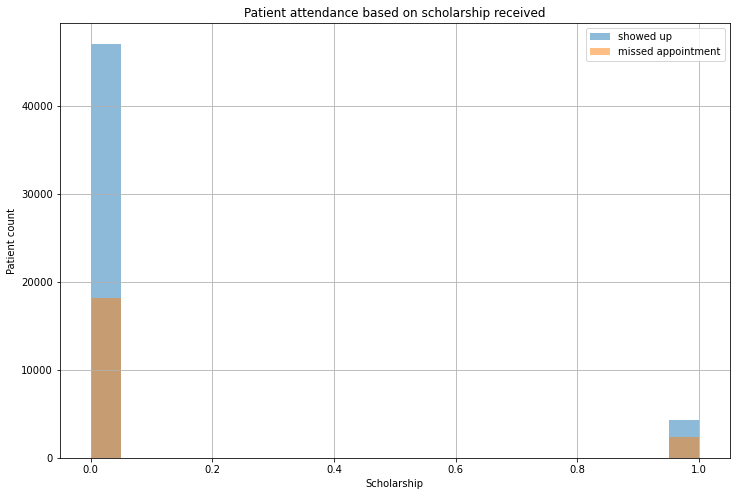

In [113]:
df.scholarship[present].hist(alpha = 0.5 , bins = 20 , label = 'showed up')
df.scholarship[absent].hist(alpha = 0.5 , bins = 20 , label = 'missed appointment')
plt.legend();

plt.title('Patient attendance based on scholarship received')
plt.xlabel('Scholarship')
plt.ylabel('Patient count');

**Observation:** Having a scholarship does not influence the possibilty to show up. Most patients weren't awarded scholarships yet they showed up. On the other hand, the patients who were awarded scholarships were not so many and some still didnt show up although most of the patients who fall into this category of scholarship owners did show up.

### Are people in a particular neighborhood more likely to show up?

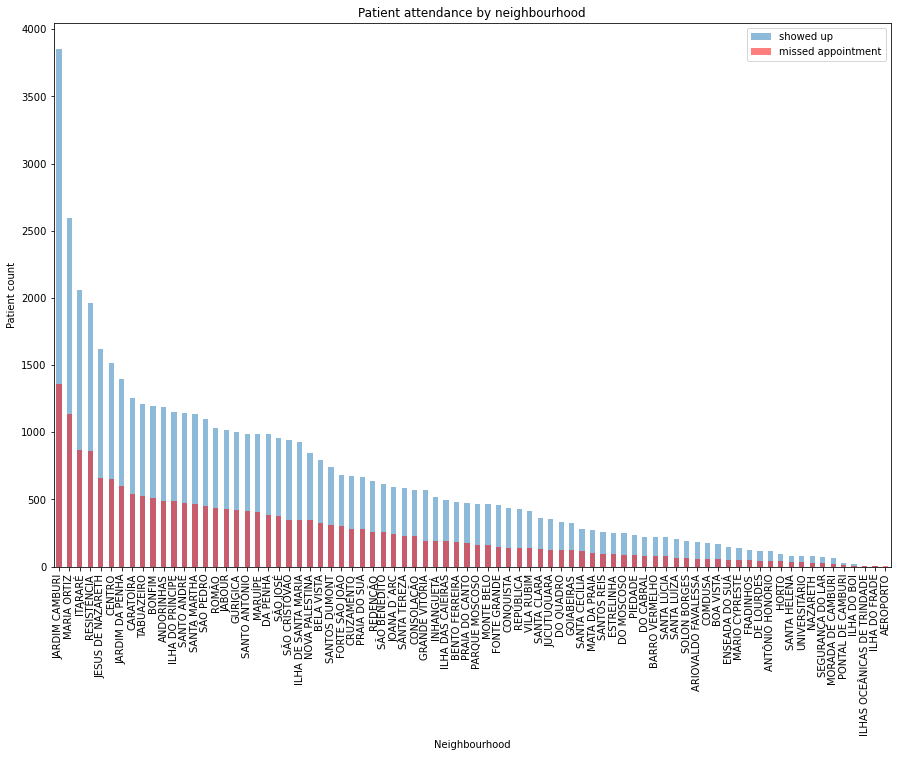

In [114]:
plt.rcParams["figure.figsize"] = (15,10)

df.neighbourhood[present].value_counts().plot(kind = 'bar' , alpha = 0.5 , label = 'showed up')
df.neighbourhood[absent].value_counts().plot(kind = 'bar' , alpha = 0.5 , color = 'red' , label = 'missed appointment')
plt.legend();

plt.xticks(rotation=90)
plt.title('Patient attendance by neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient count');

**Observation:** Although patients across all neighbourhoods showed up more than not, Patients from Jardim Camburi recorded the most attendance since the neighbourhoos accounts for more number of patients than the other locations. From observation, when compared as a group, more patients will show up than those who do not regardless of whatever group they fall into.

### Does having any illnesses or being an alcoholic influence the possibility of patients showing up?

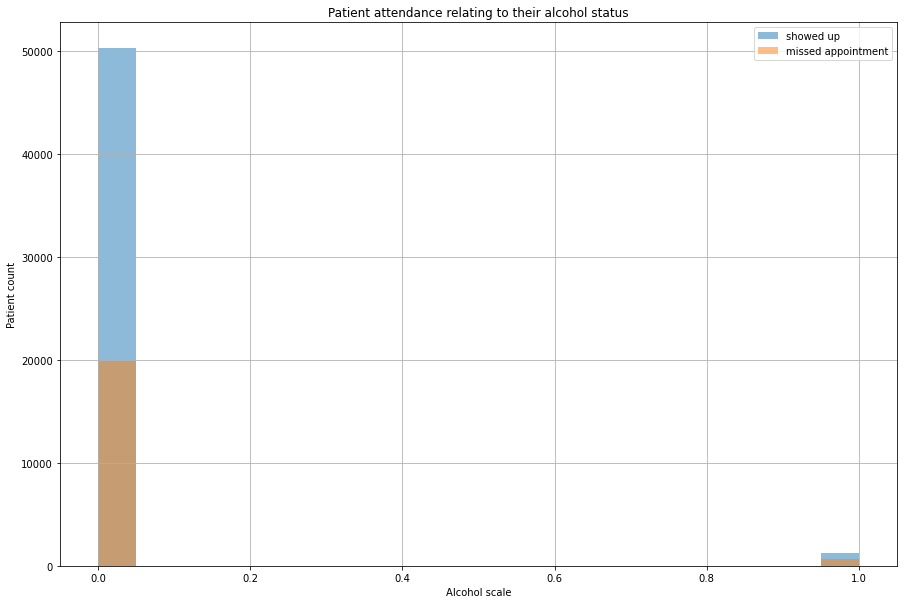

In [115]:
df.alcoholism[present].hist(alpha = 0.5 , bins = 20 , label = 'showed up')
df.alcoholism[absent].hist(alpha = 0.5 , bins = 20 , label = 'missed appointment')
plt.legend();

plt.title('Patient attendance relating to their alcohol status')
plt.xlabel('Alcohol scale')
plt.ylabel('Patient count');

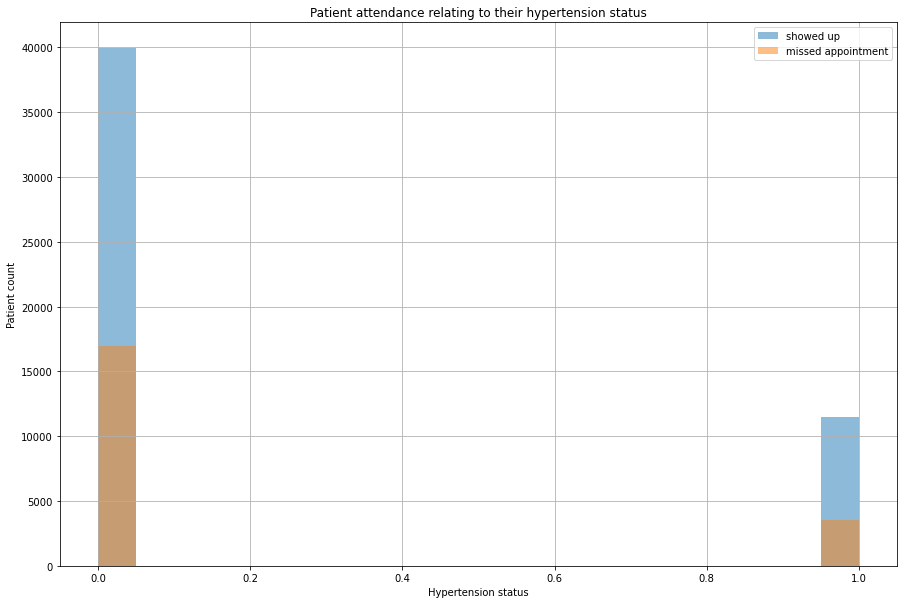

In [116]:
df.hipertension[present].hist(alpha = 0.5 , bins = 20 , label = 'showed up')
df.hipertension[absent].hist(alpha = 0.5 , bins = 20 , label = 'missed appointment')
plt.legend();

plt.title('Patient attendance relating to their hypertension status')
plt.xlabel('Hypertension status')
plt.ylabel('Patient count');

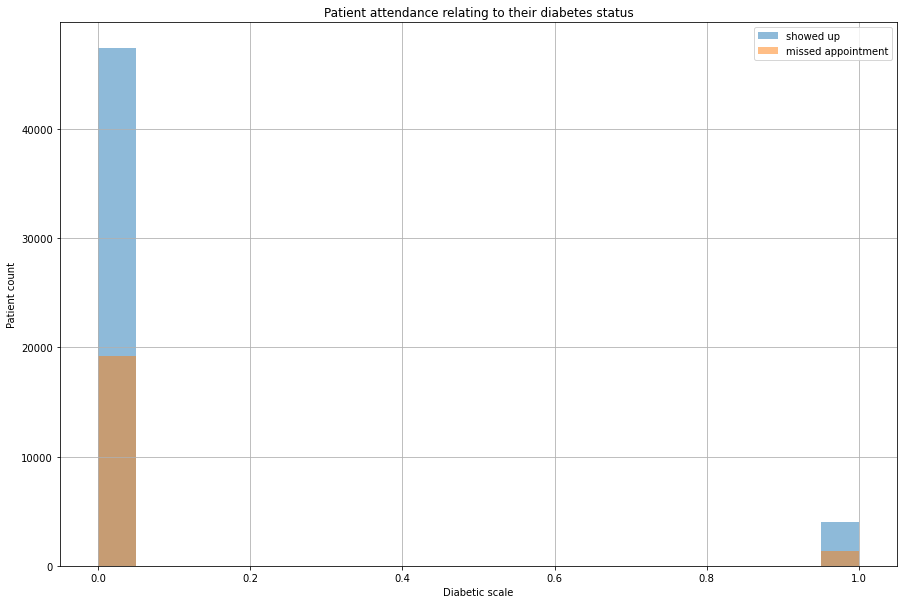

In [117]:
df.diabetes[present].hist(alpha = 0.5 , bins = 20 , label = 'showed up')
df.diabetes[absent].hist(alpha = 0.5 , bins = 20 , label = 'missed appointment')
plt.legend();

plt.title('Patient attendance relating to their diabetes status')
plt.xlabel('Diabetic scale')
plt.ylabel('Patient count');

<a id='conclusions'></a>
## Conclusions

> There are generally more people showing up for their appointments regardless of age, gender, scholarships, neighbourhoods, sickness or alcohol intake. The only time where there seems to be a correlation with show up rate and the factors listed in the dataframe is when the show up rate is compared with the wait period. The patients who show up more tend to be the patients who have shorter wait times which also accounts for the majority of the patients since not very many patients have longer wait periods.

> Because the details provided in this dataframe are not evenly distributed across patients, it is difficult to come up with precise conclusions considering what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment. About equal number of patients received sms reminders and vice versa, but more patients from both sections(received sms and did not receive sms) still showed up for their appointments regardless.